# Function h2stats

## Synopse

The *h2stats* function computes several statistics given an image histogram.

- **g = h2stats(h)**
    - **Output**
        - **g**: unidimensional array. Array containing the statistics from 
          the histogram
      
    - **Input**
        - **h**: 1-D ndarray: histogram
    
## Description

The *h2stats* function extracts some relevant statistics of the images where
the histogram was computed:

- [0] Mean (mean grayscale value)
- [1] Variance (variance of grayscale values)
- [2] Skewness
- [3] Kurtosis
- [4] entropy
- [5] mode (gray scale value with largest occurrence)
- [6] Percentile 1%
- [7] Percentile 10%
- [8] Percentile 50% (This is the median gray scale value)
- [9] Percentile 90%
- [10] Percentile 99% 


## Function Code

In [1]:
def h2stats(h):
    import numpy as np
    import ea979.src as ia

    hn = 1.0*h/h.sum() # compute the normalized image histogram
    v = np.zeros(11) # number of statistics

    # compute statistics
    n = len(h) # number of gray values
    v[0]  = np.sum((np.arange(n)*hn)) # mean
    v[1]  = np.sum(np.power((np.arange(n)-v[0]),2)*hn) # variance
    v[2]  = np.sum(np.power((np.arange(n)-v[0]),3)*hn)/(np.power(v[1],1.5))# skewness
    v[3]  = np.sum(np.power((np.arange(n)-v[0]),4)*hn)/(np.power(v[1],2))-3# kurtosis
    v[4]  = -(hn[hn>0]*np.log(hn[hn>0])).sum() # entropy
    v[5]  = np.argmax(h) # mode
    v[6:]  = ia.h2percentile(h,np.array([1,10,50,90,99])) # 1,10,50,90,99% percentile
    return v

## Examples

In [1]:
testing = (__name__ == "__main__")

if testing:
    ! jupyter nbconvert --to python h2stats.ipynb
    import numpy as np
    import sys,os
    import matplotlib.image as mpimg
    ea979path = os.path.abspath('../../')
    if ea979path not in sys.path:
        sys.path.append(ea979path)
    import ea979.src as ia


[NbConvertApp] Converting notebook h2stats.ipynb to python
[NbConvertApp] Writing 4798 bytes to h2stats.py


### Numeric Example

In [2]:
if testing:
    f = np.array([1,1,1,0,1,2,2,2,1])
    h = ia.histogram(f)
    print('statistics =', ia.h2stats(h))   

statistics = [ 1.22222222  0.39506173 -0.20992233 -0.62109375  0.93688831  1.          0.08
  0.8         1.          2.          2.        ]


### Image Example

mean = 137.065933228
variance = 7604.25522007
skewness = -0.554976386125
kurtosis =  -1.4152064701
entropy =  4.99579946489
mode =  14.0
percentil 1% =  2.0
percentil 10% =  8.0
percentil 50% =  180.0
percentil 90% =  222.0
percentil 99% =  251.0


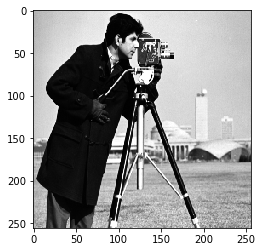

In [3]:
if testing:
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    from scipy.stats import mode, kurtosis, skew, entropy
    
    f = mpimg.imread('../data/cameraman.tif')  
    plt.imshow(f,cmap='gray')
    h = ia.histogram(f)
    v = ia.h2stats(h) 
    print('mean =',v[0])
    print('variance =',v[1])
    print('skewness =',v[2])
    print('kurtosis = ',v[3])
    print('entropy = ',v[4])
    print('mode = ',v[5])
    print('percentil 1% = ',v[6])
    print('percentil 10% = ',v[7])
    print('percentil 50% = ',v[8])
    print('percentil 90% = ',v[9])
    print('percentil 99% = ',v[10])

## Equation

The follow equations represent the statistics equations, where N denotes the number of 
intensity levels in the imagem ( usually between 0 and 255) and $p(x)$  is the probability 
density function, i.e. the normalized histogram (h) of the image, and X is a random variable 
that represents the pixels intensities $x_i$.

### Mean

$$    \mu (X) =  \sum_{i=1}^{N} x_i  p(x_i) $$

### Variance
 
$$   Var (X) = \sum_{i=1}^{N} (x_i - \mu)^2  p(x_i)   $$

### Skewness
   
$$   Skewness = \frac{\sum_{i=1}^{N} (x_i - \mu)^3  p(x_i)}{Var^{1.5}}  $$

### Kurtosis
   
$$   Kurtosis = \frac{\sum_{i=1}^{N} (x_i - \mu)^4  p(x_i)}{Var^{2}} -3 $$

### Entropy

$$   Entropy(X) = - \sum_{i=1}^{N} p(x_i) log_{2}(p(x_i))  $$

### Mode

The value that appears most often.

### Median

It is the numerical value separating the higher half of a data sample or a probability distribution.

### Percentil

O k-ésimo percentil Pk é o valor xk que corresponde à frequência cumulativa de N k/100, 
onde N é o tamanho amostral. 

Dessa forma:

- O 1º percentil determina o 1 % menor dos dados
- O 98º percentil determina o 98 % menor dos dados
- O 50º percentil determina o 50 % menor dos dados, representa a mediana
  
A definição para o p-ésimo percentil de N valores ordenados é 
correspondente ao valor que ocupa a posição k dada abaixo:

$$   k = \frac{p(n+1)}{100} $$

## See also

- `ia636:iahistogram iahistogram`
- `iah2percentile iah2percentile`

## References

- [SciPy Stats](http://docs.scipy.org/doc/scipy/reference/stats.html)
- [Wikipedia Entropy Information]('http://en.wikipedia.org/wiki/Entropy_(information_theory))  - [MATLAB Entropy](http://www.mathworks.com/help/images/ref/entropy.html)
- [Numpy Percentile](http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html)

## Contributions

- Mariana Bento, August 2013